In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Data 

In [15]:
import data

In [16]:
temp, dico = data.load_input_data('data/train_input.csv')

In [17]:
output = data.load_output_data('data/challenge_output.csv', temp, dico)

In [18]:
output['fields']

'office_temperature_degreC:Q_total_heating_kW:Q_total_AC_kW:Q_total_gains_kW:Q_total_kW'

# --X--

In [23]:
f, keys = data.features(temp, dico['building_9_2'])

0.0% of feature extraction
11.446886446886447% of feature extraction
22.893772893772894% of feature extraction
34.34065934065934% of feature extraction
45.78754578754579% of feature extraction
57.234432234432234% of feature extraction
68.68131868131869% of feature extraction
80.12820512820514% of feature extraction
91.57509157509158% of feature extraction
done


In [6]:
f.shape

(8736, 49)

In [7]:
keys

{0: 'outside_temp',
 1: 'AC_on',
 2: 'AC_temp',
 3: 'heating_on',
 4: 'heating_temp',
 5: 'ventilation_on',
 6: 'initial_temperature',
 7: 'thickness_roof_m',
 8: 'thickness_roof_m',
 9: 'airchange_ventilation_m3perh',
 10: 'surface_m2_ROOF',
 11: 'surface_3_m2_OUTW',
 12: 'heating_power_kW',
 13: 'lighting_Wperm2',
 14: 'light_percent_on_night_WE',
 15: 'orientation',
 16: 'surface_4_m2_OUTW',
 17: 'surface_2_m2_OUTW',
 18: 'PCs_percent_on_night_WE',
 19: 'window_percent_4_outwall',
 20: 'surface_m2_INTW',
 21: 'nb_occupants',
 22: 'window_percent_3_outwall',
 23: 'volume2capacitance_coeff',
 24: 'surface_1_m2_OUTW',
 25: 'Phantom_use_kW',
 26: 'AHU_high_threshold',
 27: 'surface_m2_GROU',
 28: 'window_percent_1_outwall',
 29: 'thickness_intwall_m',
 30: 'thickness_intwall_m',
 31: 'thickness_intwall_m',
 32: 'AC_power_kW',
 33: 'airchange_infiltration_m3perh',
 34: 'AHU_low_threshold',
 35: 'thickness_intfloor_m',
 36: 'thickness_intfloor_m',
 37: 'thickness_intfloor_m',
 38: 'thickn

In [19]:
r = output['building_9_2']

**--try neural net--**

In [20]:
from sklearn.neural_network import MLPRegressor

In [21]:
x_train = f[0:7000, :]
y_train = r[0:7000, 0]

x_test = f[7000:, :]
y_test = r[7000:, 0]

In [17]:
print(x_train.shape, y_train.shape)

(7000, 49) (7000,)


In [24]:
neural_net = MLPRegressor(hidden_layer_sizes=(300,), validation_fraction = 0.2, early_stopping = False,
                                   verbose = True, random_state = 777, learning_rate='constant',
                                   learning_rate_init=0.0001, tol=1e-6)

start = time.time()
neural_net.fit(x_train, y_train)
end = time.time()

print("Training time: " + str(end-start))

Iteration 1, loss = 579970.29555230
Iteration 2, loss = 20420.71761290
Iteration 3, loss = 285.32834773
Iteration 4, loss = 11.68960766
Iteration 5, loss = 7.05836428
Iteration 6, loss = 6.67465944
Iteration 7, loss = 6.66484745
Iteration 8, loss = 6.65610579
Iteration 9, loss = 6.64581076
Iteration 10, loss = 6.62820828
Iteration 11, loss = 6.61632543
Iteration 12, loss = 6.60161048
Iteration 13, loss = 6.58409166
Iteration 14, loss = 6.56974794
Iteration 15, loss = 6.54721344
Iteration 16, loss = 6.44930127
Iteration 17, loss = 6.42653717
Iteration 18, loss = 6.35350730
Iteration 19, loss = 6.30397316
Iteration 20, loss = 6.26246167
Iteration 21, loss = 6.18878358
Iteration 22, loss = 6.12919954
Iteration 23, loss = 6.12128764
Iteration 24, loss = 6.04282228
Iteration 25, loss = 5.96707241
Iteration 26, loss = 5.90586422
Iteration 27, loss = 5.86218851
Iteration 28, loss = 5.77798277
Iteration 29, loss = 5.76060601
Iteration 30, loss = 5.67208659
Iteration 31, loss = 5.60436893
Itera

In [48]:
y_hat = neural_net.predict(x_test)

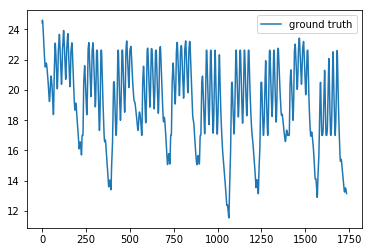

In [22]:
plt.figure()
plt.plot(y_test, label='ground truth')
#plt.plot(y_hat, label='prediction')
plt.legend()
plt.show()

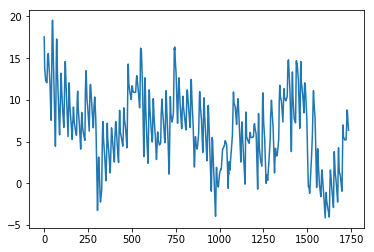

In [51]:
plt.figure()
plt.plot(x_test[:, 0])
plt.show()